###**Problem Statement:**
Youtube advertisers pay content creators based on adviews and clicks for the
goods and services being marketed. They want to estimate the adview based
on other metrics like comments, likes etc. The problem statement is therefore
to train various regression models and choose the best one to predict the
number of adviews. The data needs to be refined and cleaned before feeding
in the algorithms for better results.


##**Importing required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

##**Importing dataset**


In [ ]:
data_train = pd.read_csv('train_yt.csv')
data_train.shape

(14999, 9)

In [ ]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
data_train.tail(10)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
14989,VID_20638,22,1204587,10284,379,2016,2013-04-10,PT10H19S,G
14990,VID_11386,15,525829,350,222,F,2016-07-08,PT29M38S,D
14991,VID_2502,1,333336,152,84,F,2015-12-11,PT18M40S,C
14992,VID_11653,1,78021,422,19,14,2016-08-12,PT2M57S,D
14993,VID_13909,11,96816,122,9,11,2014-01-30,PT2M6S,D
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G
14998,VID_8534,1,15212,22,5,4,2016-02-19,PT1M1S,D


##**Removing character "F" present in data**

In [ ]:
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F'] 
data_train=data_train[data_train.dislikes!='F'] 
data_train=data_train[data_train.comment!='F']

data_train.tail(10)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
14987,VID_18084,1,303879,481,51,76,2014-06-12,PT2M17S,F
14988,VID_22836,2,214596,1431,44,67,2015-08-06,PT3M32S,G
14989,VID_20638,22,1204587,10284,379,2016,2013-04-10,PT10H19S,G
14992,VID_11653,1,78021,422,19,14,2016-08-12,PT2M57S,D
14993,VID_13909,11,96816,122,9,11,2014-01-30,PT2M6S,D
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G
14998,VID_8534,1,15212,22,5,4,2016-02-19,PT1M1S,D


##**Assigning each category a number for Category feature**

In [ ]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8} 
data_train["category"]=data_train["category"].map(category) 
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


Convert values to integers for views, likes, comments, dislikes and adview 

In [ ]:
data_train["views"] = pd.to_numeric(data_train["views"]) 
data_train["comment"] = pd.to_numeric(data_train["comment"]) 
data_train["likes"] = pd.to_numeric(data_train["likes"]) 
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"]) 
data_train["adview"]=pd.to_numeric(data_train["adview"])

In [ ]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


Storing column vidid in new variable

In [ ]:
column_vidid=data_train['vidid']
column_vidid

0        VID_18655
1        VID_14135
2         VID_2187
3        VID_23096
4        VID_10175
           ...    
14994       VID_31
14995     VID_5861
14996      VID_805
14997    VID_19843
14998     VID_8534
Name: vidid, Length: 14637, dtype: object

##**Endoding features like Category, Duration, Vidid**

In [ ]:
from sklearn.preprocessing import LabelEncoder 

data_train['duration']=LabelEncoder().fit_transform(data_train['duration']) 
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid']) 
data_train['published']=LabelEncoder().fit_transform(data_train['published'])

data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


Function to convert duration into HH:MM:SS format



In [ ]:
import time

def checki(x): 
    y = x[2:]
    h = '' 
    m = '' 
    s = '' 
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i 
        else:
            if(i=="H"): 
                h = mm
                mm = '' 
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = '' 
    if(h==''):
        h = '00' 
    if(m == ''): 
        m = '00'
    if(s==''): 
        s='00'
    bp = h+':'+m+':'+s
    return bp

Converting values of duration attribute into HH:MM:SS format 

In [ ]:
train=pd.read_csv("train_yt.csv")
mp = pd.read_csv("train_yt.csv")["duration"] 
time = mp.apply(checki)

Function to convert time into seconds from HH:MM:SS format 

In [ ]:
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

Converting values of duration attribute into seconds



In [ ]:
time1=time.apply(func_sec)

data_train["duration"]=time1 
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


##**Visualizing data**

Plotting the histogram of category attribute

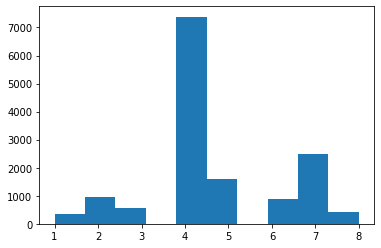

In [ ]:
# Individual Plots
plt.hist(data_train["category"]) 
plt.show() 

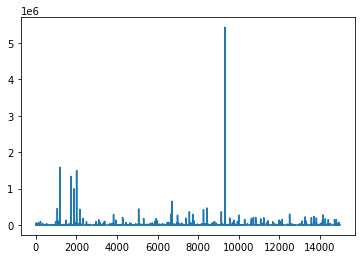

In [ ]:
plt.plot(data_train["adview"])
plt.show() 

Removing videos with adview greater than 2000000 as outlier 

In [ ]:
data_train = data_train[data_train["adview"] <2000000]

Replotting the histogram of adview attribute

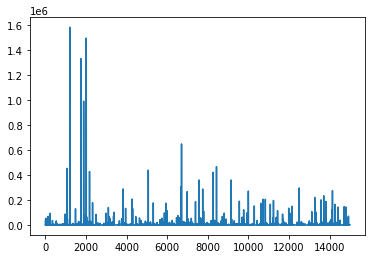

In [ ]:
plt.plot(data_train["adview"])
plt.show()

##**Plotting heatmap**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


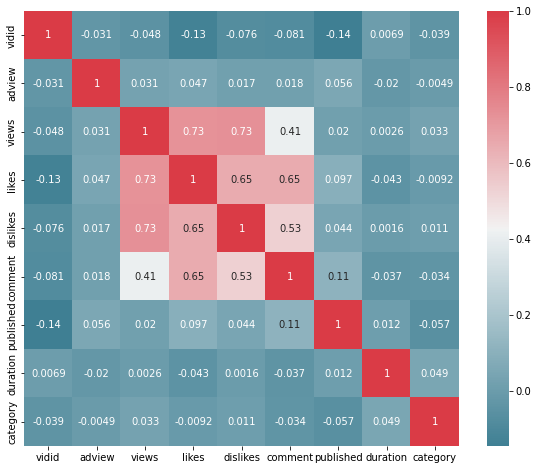

In [ ]:
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)
plt.show()

From heap, we can say that vidid attribute is poorly correlated with adview attribute. Hence, we should remove vidid attribute while training the model. 

##**Removing class column and vidid column**

In [ ]:
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target']) 
data_train=data_train.drop(["adview"],axis=1) 
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


##**Splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)

X_train.shape

(11708, 7)

In [ ]:
X_train.describe()

,views,likes,dislikes,comment,published,duration,category
count,1.170800e+04,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000
mean,6.974161e+05,2771.122139,251.030577,418.178767,1551.810215,1048.108985,4.611548
std,2.582877e+06,8734.608422,965.881840,1556.703705,579.565587,2379.930309,1.579242
min,4.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.133975e+04,86.000000,7.000000,7.000000,1144.000000,188.000000,4.000000
50%,1.609395e+05,461.000000,39.000000,46.000000,1704.000000,327.000000,4.000000
75%,5.842132e+05,1897.000000,170.000000,232.000000,2065.000000,726.000000,6.000000
max,1.380479e+08,283824.000000,49449.000000,75045.000000,2383.000000,42317.000000,8.000000


##**Normalizing the Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
X_train=scaler.fit_transform(X_train) 
X_test=scaler.fit_transform(X_test)

X_train.mean()

0.1739096800320488

##**Training the model and predicting the results**

Function to print different errors

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def PrintEveluationParameters(X_test, y_test, model_name):
    y_pred = model_name.predict(X_test)
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred)) 

(1) Using linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
PrintEveluationParameters(X_test,y_test, linear_regression)

Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337


(2) Using Decision tree regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
PrintEveluationParameters(X_test,y_test, decision_tree)

Mean Absolute Error: 2747.1448087431695
Mean Squared Error: 901190005.693989


##**Conclusion**

Since the error is mean absolute error is less for Decision tree regressor, we should select Decision tree regressor as model to predict YouTube Ad-view.
